In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import shelve
import os
import plot_utilities

%matplotlib inline

In [2]:
dataFolder = "Data"
datasetFolder = "CO90"
filename = "CO90_data_gc"
fullFilePath = os.path.join(dataFolder, datasetFolder, filename)

network1Key = "sex-network"
network2Key = "drug-network"
combinedNetworkKey = "combined-network"

with shelve.open(fullFilePath) as data:
    network1 = data[network1Key]
    network2 = data[network2Key]
    combined_network = data[combinedNetworkKey]
networks = [network1, network2]

try:
    with shelve.open("pos") as data:
        pos = data["CO90"]
except:
    np.random.seed(1)
    pos = nx.spring_layout(combined_network)
    with shelve.open("pos") as data:
        data["CO90"] = pos

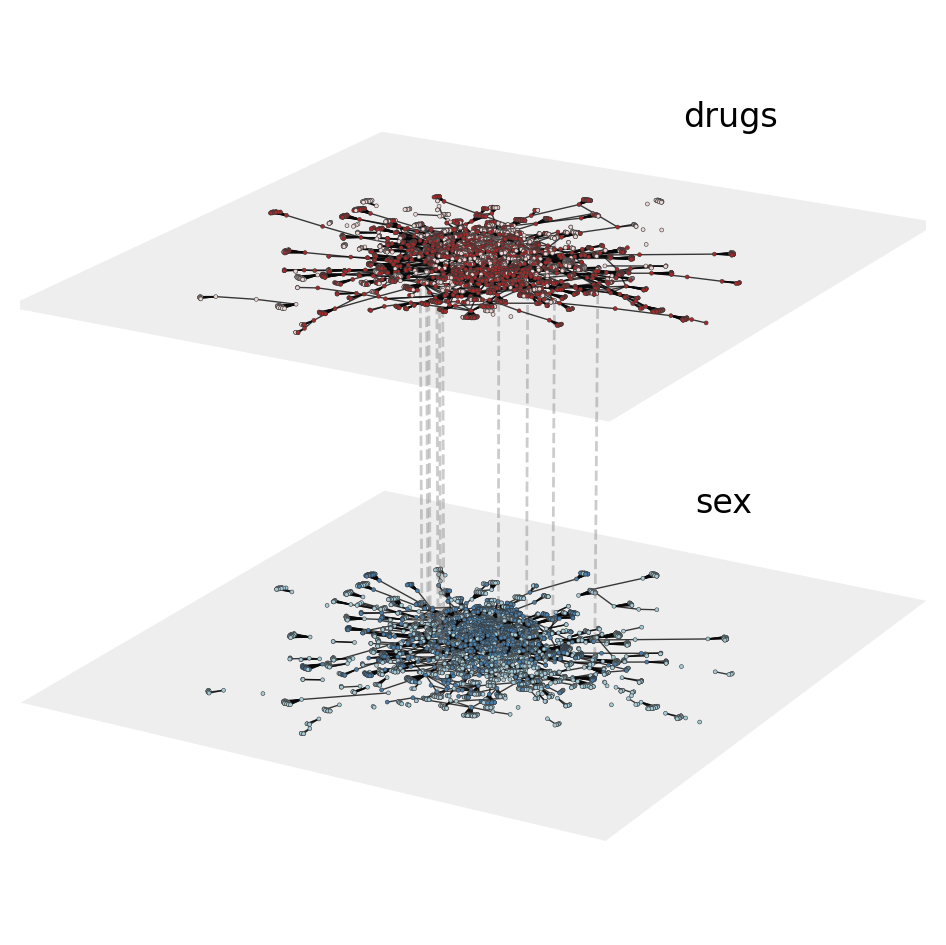

In [5]:
gc_colors = ["steelblue", "firebrick"]
iso_colors = ["lightblue", "mistyrose"]
edge_colors = ["steelblue", "firebrick"]
edge_colors = ["black", "black"]
plane_colors = ["grey", "grey"]
labels = ["sex", "drugs"]

fig = plt.figure(figsize=(8, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection="3d")
plot_utilities.plot_multiplex_network(
    ax,
    networks,
    pos,
    gc_colors,
    iso_colors,
    edge_colors,
    plane_colors,
    labels,
    node_size=2,
    edge_width=0.5,
    width=8,
    height=6,
    label_pos=1.1,
)
plt.savefig("Figures/multilayer_network_CO90.pdf", dpi=1000, bbox_inches="tight")
plt.savefig("Figures/multilayer_network_CO90.png", dpi=1000, bbox_inches="tight")
plt.show()